In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 顯示完整的精確度
np.set_printoptions(suppress=True) 

## 1) 載入資料集
此範例使用波士頓房價預測資料集 (boston house-prices dataset)

In [2]:
from sklearn.datasets import load_boston

digits = load_boston()
print('Features:', digits.feature_names)

# 觀看資料集的內容
X, y = digits.data, digits.target
print('x_shape:', X.shape)
print('y_shape:', y.shape)

Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
x_shape: (506, 13)
y_shape: (506,)


# 2) 資料前處理

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# scaled之後的資料零均值，單位方差  
print('資料集 X 的平均值 : ', X.mean(axis=0))
print('資料集 X 的標準差 : ', X.std(axis=0))

print('\nStandardScaler 縮放過後資料集 X 的平均值 : ', X_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', X_scaled.std(axis=0))


資料集 X 的平均值 :  [  3.61352356  11.36363636  11.13677866   0.06916996   0.55469506
   6.28463439  68.57490119   3.79504269   9.54940711 408.23715415
  18.4555336  356.67403162  12.65306324]
資料集 X 的標準差 :  [  8.59304135  23.29939569   6.85357058   0.25374293   0.11576312
   0.70192251  28.12103257   2.10362836   8.69865112 168.37049504
   2.16280519  91.20460745   7.13400164]

StandardScaler 縮放過後資料集 X 的平均值 :  [-0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  0. -0.]
StandardScaler 縮放過後資料集 X 的標準差 :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# 3) 將資料切分成訓練集、驗證集和測試集
- 訓練集 (training set)
- 驗證 (testing set)
- 測試集 (validation set)

In [4]:
from sklearn.model_selection import train_test_split
# 從資料集切分為訓練集以及測試集，以便評估模型
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 再從訓練集挪取一部份作為驗證集，以便調整訓練參數
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25)

print('training set: {}'.format(len(x_train)))
print('testing set: {}'.format(len(x_test)))
print('validation set: {}'.format(len(x_valid)))

training set: 265
testing set: 152
validation set: 89


# 4) 建構模型
使用 Tensorflow Keras API 建立 Sequential Model

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(16, activation='relu',
                       input_shape=(x_train.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 編譯模型用以訓練 (設定 optimizer, loss function, metrics, 等等)
model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.05))

In [7]:
# 設定訓練參數
batch_size = 32  # 每次看 batch_size 筆的資料就更新權重
epochs = 50      # 一個 epoch 會看過一次所有的資料

# 訓練模型
model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_valid, y_valid),
                          shuffle=True)

Epoch 1/50
9/9 [==============================] - 1s 55ms/step - loss: 1856.3174 - val_loss: 116.9966
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 157.0812 - val_loss: 107.8167
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 122.0773 - val_loss: 51.4238
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 80.1131 - val_loss: 53.1903
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 80.8786 - val_loss: 42.6322
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 55.1641 - val_loss: 41.5695
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 71.8038 - val_loss: 38.1061
Epoch 8/50
9/9 [==============================] - 0s 5ms/step - loss: 63.1416 - val_loss: 38.9494
Epoch 9/50
9/9 [==============================] - 0s 5ms/step - loss: 68.5389 - val_loss: 65.6430
Epoch 10/50
9/9 [==============================] - 0s 5ms/step - loss: 65.5099 - val_loss: 35.4513
Epoch 11/50


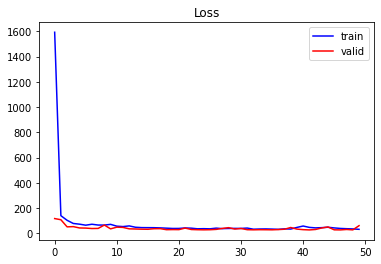

In [8]:
# 視覺化訓練過程
plt.plot(model_history.history['loss'], 'b', label='train')
plt.plot(model_history.history['val_loss'], 'r', label='valid')
plt.legend()
plt.title('Loss')
plt.show()

## 模型評估

In [9]:
test_loss = model.evaluate(x=x_test, y=y_test, verbose=0)

print('testing mean squared error: {:.2f}'.format(test_loss))

testing mean squared error: 58.12


## 儲存模型

#### HDF5 檔

In [10]:
model.save('./weights/boston_model.h5')

#### pb 檔

In [11]:
model.save('./checkpoints/boston_model.pb')

INFO:tensorflow:Assets written to: ./checkpoints/boston_model.pb/assets


## 載入模型

#### HDF5 檔

In [12]:
myModel = keras.models.load_model('./weights/boston_model.h5')

In [13]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [14]:
test_loss = myModel.evaluate(x=x_test, y=y_test, verbose=0)

print('testing mean squared error: {:.2f}'.format(test_loss))

testing mean squared error: 58.12


#### pb 檔

In [15]:
myModel = keras.models.load_model('./checkpoints/boston_model.pb')

In [16]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [17]:
test_loss = myModel.evaluate(x=x_test, y=y_test, verbose=0)

print('testing mean squared error: {:.2f}'.format(test_loss))

testing mean squared error: 58.12
